<a href="https://colab.research.google.com/github/paulo-santos-ds/Estatistica/blob/main/Indice_VIX_vs_CDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Obter dados históricos do vix
vix = yf.download("^VIX", start="2000-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Obter dados históricos do CDI
cdi = pd.read_csv("http://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv", sep=";", decimal=",")
cdi['data'] = pd.to_datetime(cdi['data'], format="%d/%m/%Y")
cdi.set_index('data', inplace=True)
cdi = cdi.loc[vix.index.min():vix.index.max()]

In [ ]:
# Calculando a variação diaria atraves do preço de fechamento VIX e do CDI
vix_daily_return = vix['Adj Close'].pct_change()
cdi_daily_return = cdi['valor'].pct_change()

In [ ]:
# Calculando a variação VIX e do CDI
vix_cumulative_return = (1 + vix_daily_return).cumprod() - 1
cdi_cumulative_return = (1 + cdi_daily_return).cumprod() - 1

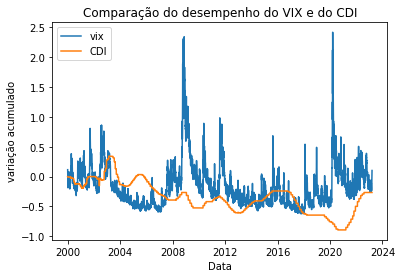

In [ ]:
# Gráfico comparando o desempenho do indice VIX e do CDI
plt.plot(vix_cumulative_return.index, vix_cumulative_return, label='vix')
plt.plot(cdi_cumulative_return.index, cdi_cumulative_return, label='CDI')
plt.legend()
plt.title('Comparação do desempenho do VIX e do CDI')
plt.xlabel('Data')
plt.ylabel('variação acumulado')
plt.show()